##  Feature Scaling & Feature Engineering


### Assignment 

Repeat the steps for the test data and report your results at the bottom of this notebook.

#### Requirements:

- Show the results (MSE, MAE, RMSE) for all models finished during the lecture using the test data.
- Make sure to follow the steps and all additional preprocessing code
- Your results should be displayed at the bottom of this notebook in a single code cell output or markdown cell
- Only progress as far as we progressed in class

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Cost Functions
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

# Feature Engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# Plot style
plt.style.use("seaborn-whitegrid")

In [2]:
# Load Data
df = sns.load_dataset("diamonds")

# original dataset (100 records 80%20%) --> init_train (80 records) and test (20 records)
# init_train (80 records 80%20%) --> train_actual (64 records) and vali (16 records)

# EDA will happen on init_train --> train the model on train_actual --> test in vali
# keep looping until you are happy about the model performance 

# test the model on the bild dataset "test"


# Split Data
train, test = train_test_split(
    df, 
    train_size = .80,
    test_size =.20,
    random_state=42
)

train, val = train_test_split(
    train,
    train_size = .80,
    test_size = .20,
    random_state=42
)

In [3]:
train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
6881,1.16,Good,F,SI2,60.8,65.0,4131,6.78,6.75,4.11
15412,1.51,Premium,I,SI2,61.3,55.0,6173,7.41,7.36,4.53
3782,1.01,Good,G,SI2,64.0,59.0,3461,6.34,6.31,4.05
34635,0.31,Ideal,E,VS2,61.9,55.0,872,4.39,4.36,2.71
37155,0.32,Ideal,D,VS2,61.0,57.0,972,4.46,4.42,2.71


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34521 entries, 6881 to 49854
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    34521 non-null  float64 
 1   cut      34521 non-null  category
 2   color    34521 non-null  category
 3   clarity  34521 non-null  category
 4   depth    34521 non-null  float64 
 5   table    34521 non-null  float64 
 6   price    34521 non-null  int64   
 7   x        34521 non-null  float64 
 8   y        34521 non-null  float64 
 9   z        34521 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 2.2 MB


In [5]:
# Model with only numeric features
train.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [6]:
(df.dtypes != "category").values & (df.dtypes != "object").values 

array([ True, False, False, False,  True,  True,  True,  True,  True,
        True])

In [7]:
def cleaner(df):
    
    "Return Only Numeric Features"
    
    # Create boolean array with only columns that are float64
    columns_bool = (df.dtypes != "category").values & (df.dtypes != "object").values 

    # Return only numeric columns
    df = df.iloc[:, columns_bool].dropna()

    return df

train_numeric = cleaner(train)
val_numeric = cleaner(val)
test_numeric = cleaner(test)

In [8]:
# Create X, y train and validation sets

target = "price"

# feature set --> everything except for price --> X_train
# target set/column --> price --> y_train

X_train = train_numeric.drop(target, axis=1)
y_train = train_numeric[target]

X_val = val_numeric.drop(target, axis=1)
y_val = val_numeric[target]

X_test = test_numeric.drop(target, axis=1)
y_test = test_numeric[target]

In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_val, y_val)

0.8661014078099777

In [10]:
lr_t = LinearRegression()
lr_t.fit(X_train, y_train)
lr_t.score(X_test, y_test)

0.8589396072085457

In [11]:
lr.coef_

array([10648.67477587,  -200.44764091,  -105.60923409, -1273.05445187,
          38.36164601,    54.22385327])

In [12]:
lr_t.coef_

array([10648.67477587,  -200.44764091,  -105.60923409, -1273.05445187,
          38.36164601,    54.22385327])

In [13]:
lr.intercept_

20770.152708563684

In [14]:
lr_t.intercept_

20770.152708563684

In [15]:
pd.concat([X_train, y_train], axis = 1)

,carat,depth,table,x,y,z,price
6881,1.16,60.8,65.0,6.78,6.75,4.11,4131
15412,1.51,61.3,55.0,7.41,7.36,4.53,6173
3782,1.01,64.0,59.0,6.34,6.31,4.05,3461
34635,0.31,61.9,55.0,4.39,4.36,2.71,872
37155,0.32,61.0,57.0,4.46,4.42,2.71,972
...,...,...,...,...,...,...,...
15653,1.54,61.5,61.0,7.41,7.31,4.53,6278
30039,0.32,61.3,56.0,4.40,4.44,2.71,719
47963,0.52,61.2,58.0,5.20,5.16,3.17,1919
48105,0.50,60.7,57.0,5.14,5.10,3.11,1935


 # Using Model for one record prediction
 
 ## y = (a x1) + (b x2) + (c x3) + (d x4) + (e x5) + (f x6) + (g x7) + intercept
 
 ### where [a,b,c,d,e,f,g] are the coeffecients from lr.coef_

In [16]:
# predicting resutls from the model

np.round(lr.predict([[1.16, 60.8, 65, 6.78,6.75,4.11]]))

array([5921.])

In [17]:
def calc_cost(y_true, y_predict):
    
    "Calculate Cost Functions and print output"
    
    result_dict = {}
    
    mse = mean_squared_error(y_true, y_predict)
    mae = mean_absolute_error(y_true, y_predict)
    rmse = mean_squared_error(y_true, y_predict, squared=False)
    
    ls = [mse, mae, rmse]
    ls2 = ["MSE", "MAE", "RMSE"]
    
    for x in range(len(ls)):
        print(f"{ls2[x]}: {ls[x]}")
        result_dict[ls2[x]] = ls[x]
    
    return result_dict

# Save results to object and print results
print("Baseline")
b_preds = [y_train.mean() for x in range(len(y_train))]
res0 = calc_cost(y_train, b_preds)
print("\nLinear Regression")
res1 = calc_cost(y_train, lr.predict(X_train))

Baseline
MSE: 15959446.675367089
MAE: 3040.771604515672
RMSE: 3994.927618288858

Linear Regression
MSE: 2273010.7496576365
MAE: 897.1133312353479
RMSE: 1507.6507386187413


In [18]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Feature Scaling


#### Standard Scaler

In [19]:
# Instantiate Scaler Object
scaler = StandardScaler()

# Apply to X data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Look at the transformed data
X_train_scaled[:5]

array([[ 0.76065523, -0.65936779,  3.38008664,  0.93095265,  0.87228948,
         0.79789836],
       [ 1.50008953, -0.31065901, -1.10124667,  1.49329074,  1.39958645,
         1.38787882],
       [ 0.44375482,  1.57236842,  0.69128665,  0.53820859,  0.49194412,
         0.71361543],
       [-1.03511376,  0.10779153, -1.10124667, -1.20236168, -1.19367736,
        -1.16870318],
       [-1.01398707, -0.51988428, -0.20498001, -1.13987967, -1.14181208,
        -1.16870318]])

In [20]:
# Train the model
lr2 = LinearRegression()
lr2.fit(X_train_scaled, y_train)
lr2.score(X_val_scaled, y_val)

0.8661014078099777

In [21]:
# Train the model
lr2_t = LinearRegression()
lr2_t.fit(X_train_scaled, y_train)
lr2_t.score(X_test_scaled, y_test)

0.8589396072085457

In [22]:
res2 = calc_cost(y_val, lr2.predict(X_val_scaled))

MSE: 2109905.5491603212
MAE: 874.8336552092414
RMSE: 1452.5513929497715


In [23]:
res2_t = calc_cost(y_test, lr2_t.predict(X_test_scaled))

MSE: 2242411.878050298
MAE: 889.4218078106036
RMSE: 1497.4684898355283


In [24]:
lr2.coef_

array([ 5040.38858449,  -287.41409738,  -235.66476004, -1426.23152   ,
          44.37841515,    38.60130958])

In [25]:
lr2_t.coef_

array([ 5040.38858449,  -287.41409738,  -235.66476004, -1426.23152   ,
          44.37841515,    38.60130958])

In [26]:
pd.DataFrame(X_train_scaled).describe()

,0,1,2,3,4,5
count,3.452100e+04,3.452100e+04,3.452100e+04,3.452100e+04,3.452100e+04,3.452100e+04
mean,-3.980414e-16,-7.158949e-15,1.496753e-15,5.003208e-16,-2.210605e-16,-6.655051e-16
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,-1.267507e+00,-1.307340e+01,-3.790047e+00,-5.120876e+00,-4.962554e+00,-4.975482e+00
25%,-8.449735e-01,-5.198843e-01,-6.531133e-01,-9.078036e-01,-8.738415e-01,-8.877601e-01
50%,-2.111727e-01,3.804977e-02,-2.049800e-01,-3.305550e-02,-2.670864e-02,-1.683656e-02
75%,5.282616e-01,5.262421e-01,6.912867e-01,7.256546e-01,6.907610e-01,6.995683e-01
max,8.894432e+00,1.203363e+01,1.682409e+01,4.465649e+00,4.595186e+01,3.969447e+01


#### Looking at the Parameters of the Model (Weights)

We can look at calculated parameters of the model side by side and notice the scales have changed. Looking at the parameters of the model can help us understand which features or more important. 

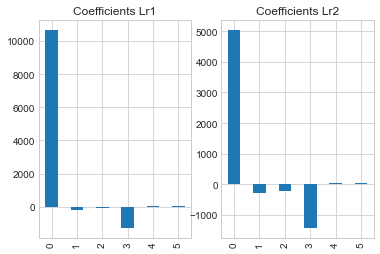

In [27]:
fig, ax = plt.subplots(1,2)

pd.Series(lr.coef_).plot(kind="bar", title="Coefficients Lr1", ax=ax[0])
pd.Series(lr2.coef_).plot(kind="bar", title="Coefficients Lr2", ax=ax[1]);

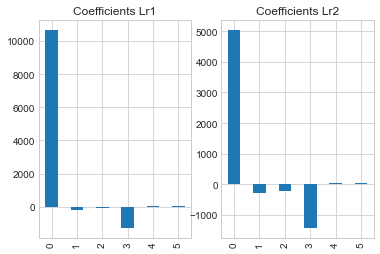

In [28]:
fig, ax = plt.subplots(1,2)

pd.Series(lr.coef_).plot(kind="bar", title="Coefficients Lr1", ax=ax[0])
pd.Series(lr2.coef_).plot(kind="bar", title="Coefficients Lr2", ax=ax[1]);

#### Robust Scaler

In [29]:
# Instantiate Scaler Object
scaler2 = RobustScaler()

# Apply to X data
X_train_robust = scaler2.fit_transform(X_train)
X_val_robust = scaler2.transform(X_val)
X_test_robust = scaler2.transform(X_test)

# Look at the transformed data
X_train_robust[:5]

array([[ 0.70769231, -0.66666667,  2.66666667,  0.59016393,  0.57458564,
         0.51327434],
       [ 1.24615385, -0.33333333, -0.66666667,  0.93442623,  0.91160221,
         0.88495575],
       [ 0.47692308,  1.46666667,  0.66666667,  0.34972678,  0.33149171,
         0.46017699],
       [-0.6       ,  0.06666667, -0.66666667, -0.71584699, -0.74585635,
        -0.72566372],
       [-0.58461538, -0.53333333,  0.        , -0.67759563, -0.71270718,
        -0.72566372]])

In [30]:
# Train the model
lr3 = LinearRegression()
lr3.fit(X_train_robust, y_train)
lr3.score(X_val_robust, y_val)

0.8661014078099777

In [31]:
# Train the model
lr3_t = LinearRegression()
lr3_t.fit(X_train_robust, y_train)
lr3_t.score(X_test_robust, y_test)

0.8589396072085457

In [32]:
res3 = calc_cost(y_val, lr3.predict(X_val_robust))

MSE: 2109905.5491603212
MAE: 874.8336552092425
RMSE: 1452.5513929497715


In [33]:
res3_t = calc_cost(y_test, lr3_t.predict(X_test_robust))

MSE: 2242411.878050298
MAE: 889.4218078106045
RMSE: 1497.4684898355283


In [34]:
lr3.coef_

array([ 6921.63860431,  -300.67146137,  -316.82770227, -2329.68964692,
          69.43457927,    61.2729542 ])

In [35]:
lr3_t.coef_

array([ 6921.63860431,  -300.67146137,  -316.82770227, -2329.68964692,
          69.43457927,    61.2729542 ])

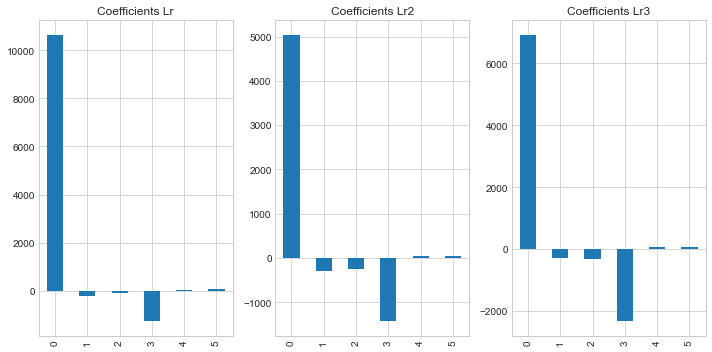

In [36]:
fig, ax = plt.subplots(1,3)

pd.Series(lr.coef_).plot(kind="bar", title="Coefficients Lr", ax=ax[0])
pd.Series(lr2.coef_).plot(kind="bar", title="Coefficients Lr2", ax=ax[1])
pd.Series(lr3.coef_).plot(kind="bar", title="Coefficients Lr3", ax=ax[2], figsize=(10,5))
plt.tight_layout();

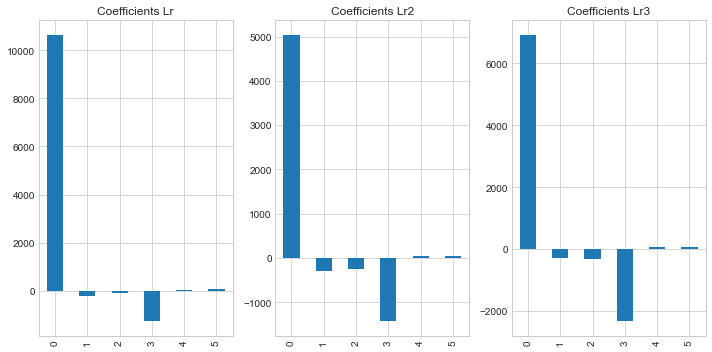

In [37]:
fig, ax = plt.subplots(1,3)

pd.Series(lr.coef_).plot(kind="bar", title="Coefficients Lr", ax=ax[0])
pd.Series(lr2_t.coef_).plot(kind="bar", title="Coefficients Lr2", ax=ax[1])
pd.Series(lr3_t.coef_).plot(kind="bar", title="Coefficients Lr3", ax=ax[2], figsize=(10,5))
plt.tight_layout();

#### Min Max Scaler


In [38]:
# Instantiate Scaler Object
scaler3 = MinMaxScaler()

# Apply to X data
X_train_mm = scaler3.fit_transform(X_train)
X_val_mm = scaler3.transform(X_val)
X_test_mm = scaler3.transform(X_test)

# Look at the transformed data
X_train_mm[:5]

array([[0.1995842 , 0.49444444, 0.34782609, 0.63128492, 0.11460102,
        0.12924528],
       [0.27234927, 0.50833333, 0.13043478, 0.68994413, 0.12495756,
        0.14245283],
       [0.16839917, 0.58333333, 0.2173913 , 0.59031657, 0.10713073,
        0.12735849],
       [0.02286902, 0.525     , 0.13043478, 0.40875233, 0.07402377,
        0.08522013],
       [0.02494802, 0.5       , 0.17391304, 0.41527002, 0.07504244,
        0.08522013]])

In [39]:
# Train the model
lr4 = LinearRegression()
lr4.fit(X_train_mm, y_train)
lr4.score(X_val_mm, y_val)

0.8661014078099777

In [40]:
# Train the model
lr4_t = LinearRegression()
lr4_t.fit(X_train_mm, y_train)
lr4_t.score(X_test_mm, y_test)

0.8589396072085457

In [41]:
res4 = calc_cost(y_val, lr4.predict(X_val_mm))

MSE: 2109905.5491603212
MAE: 874.8336552092418
RMSE: 1452.5513929497715


In [42]:
res4_t = calc_cost(y_test, lr4_t.predict(X_test_mm))

MSE: 2242411.878050298
MAE: 889.4218078106037
RMSE: 1497.4684898355283


In [43]:
lr4.coef_

array([ 51220.12567193,  -7216.11507285,  -4858.02476812, -13672.60481307,
         2259.50094986,   1724.31853409])

In [44]:
lr4_t.coef_

array([ 51220.12567193,  -7216.11507285,  -4858.02476812, -13672.60481307,
         2259.50094986,   1724.31853409])

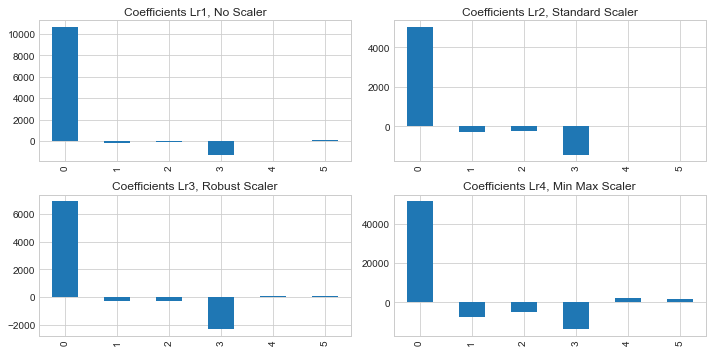

In [45]:
fig, ax = plt.subplots(2,2)

pd.Series(lr.coef_).plot(kind="bar", title="Coefficients Lr1, No Scaler", ax=ax[0,0])
pd.Series(lr2.coef_).plot(kind="bar", title="Coefficients Lr2, Standard Scaler", ax=ax[0,1])
pd.Series(lr3.coef_).plot(kind="bar", title="Coefficients Lr3, Robust Scaler", ax=ax[1,0])
pd.Series(lr4.coef_).plot(kind="bar", title="Coefficients Lr4, Min Max Scaler", ax=ax[1,1], figsize=(10,5))

plt.tight_layout();

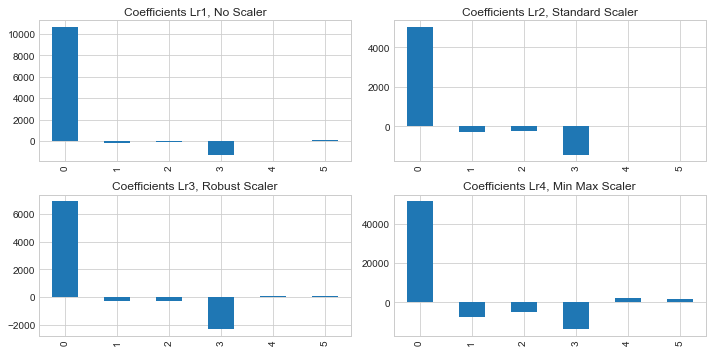

In [46]:
fig, ax = plt.subplots(2,2)

pd.Series(lr.coef_).plot(kind="bar", title="Coefficients Lr1, No Scaler", ax=ax[0,0])
pd.Series(lr2_t.coef_).plot(kind="bar", title="Coefficients Lr2, Standard Scaler", ax=ax[0,1])
pd.Series(lr3_t.coef_).plot(kind="bar", title="Coefficients Lr3, Robust Scaler", ax=ax[1,0])
pd.Series(lr4_t.coef_).plot(kind="bar", title="Coefficients Lr4, Min Max Scaler", ax=ax[1,1], figsize=(10,5))

plt.tight_layout();

## Feature Engineering


#### One Hot Encoding

In [47]:
train.describe(exclude="number")

,cut,color,clarity
count,34521,34521,34521
unique,5,7,8
top,Ideal,G,SI1
freq,13900,7188,8450


In [48]:
# Create our One Hot Encoder object
one_hot = OneHotEncoder()

col_names = ["color", "clarity"]

# One Hot encode the column
one_hot_df = one_hot.fit_transform(train[col_names]).toarray()
one_hot_df_val = one_hot.transform(val[col_names]).toarray()
one_hot_df_test = one_hot.transform(test[col_names]).toarray()

In [49]:
# Look at the categories
one_hot.categories_

[array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object),
 array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
       dtype=object)]

In [50]:
# Create column names list for one hot encoded features
column_names = []

for y in range(len(one_hot.categories_)):
    for z in range(len(one_hot.categories_[y])):
        # print(one_hot.categories_[y][z])
        column_names.append(col_names[y]+"_"+one_hot.categories_[y][z])


column_names

['color_D',
 'color_E',
 'color_F',
 'color_G',
 'color_H',
 'color_I',
 'color_J',
 'clarity_I1',
 'clarity_IF',
 'clarity_SI1',
 'clarity_SI2',
 'clarity_VS1',
 'clarity_VS2',
 'clarity_VVS1',
 'clarity_VVS2']

In [51]:
def col_names(one_hot_model):
    
    "Create columns names list for one hot encoded feature"
    
    column_names = []
    
    col_names = ["color", "clarity"]

    for y in range(len(one_hot_model.categories_)):
        for z in range(len(one_hot_model.categories_[y])):
            # print(one_hot.categories_[y][z])
            column_names.append(col_names[y]+"_"+one_hot_model.categories_[y][z])
            
    return column_names

column_names = col_names(one_hot)

In [52]:
# Values for each row
one_hot_df

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [53]:
# Cast One Hot Encoded values into a dataframe

oh_df = pd.DataFrame(
    one_hot_df,
    index=train.index,
    columns = column_names
)

oh_df_val = pd.DataFrame(
    one_hot_df_val,
    index=val.index,
    columns = column_names
)

oh_df_test = pd.DataFrame(
    one_hot_df_test,
    index=test.index,
    columns = column_names
)


print(oh_df.shape)
print(oh_df_val.shape)
print(oh_df_test.shape)

(34521, 15)
(8631, 15)
(10788, 15)


In [54]:
# Create train_new df by merging train and one hot encoded df together and drop color and clarity cols
train_new = train.merge(oh_df, on=train.index).set_index("key_0").drop(["color", "clarity"], axis=1)
val_new = val.merge(oh_df_val, on=val.index).set_index("key_0").drop(["color", "clarity"], axis=1)
test_new = test.merge(oh_df_test, on=test.index).set_index("key_0").drop(["color", "clarity"], axis=1)

print(train_new.shape)
print(val_new.shape)
print(test_new.shape)

(34521, 23)
(8631, 23)
(10788, 23)


#### Ordinal Encoder 


In [55]:
ordinal = OrdinalEncoder()

col_names = ["cut"]

# Ordinal encode the column
ordinal_ls = ordinal.fit_transform(train[col_names])
ordinal_ls_val = ordinal.transform(val[col_names])
ordinal_ls_test = ordinal.transform(test[col_names])

In [56]:
# Look at categories
ordinal.categories_

[array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object)]

In [57]:
# Add oridnally encoded column to the data
train_new["cut"] = ordinal_ls
val_new["cut"] = ordinal_ls_val
test_new["cut"] = ordinal_ls_test

train_new.sample(5)

,carat,cut,depth,table,price,x,y,z,color_D,color_E,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
key_0,,,,,,,,,,,,,,,,,,,,,
24063,1.33,2.0,62.6,57.0,12209,7.04,6.99,4.39,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11293,1.00,4.0,60.7,60.0,4978,6.55,6.49,3.96,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27220,2.36,2.0,62.2,55.0,17569,8.51,8.56,5.30,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10348,0.90,2.0,62.7,56.0,4770,6.14,6.18,3.86,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
28450,0.32,2.0,62.1,53.0,671,4.42,4.44,2.75,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### Model Using One Hot and Ordinally Encoded Features

In [58]:
target = "price"

X_train = train_new.drop(target, axis=1)
y_train = train_new[target]

X_val = val_new.drop(target, axis=1)
y_val = val_new[target]

X_test = test_new.drop(target, axis=1)
y_test = test_new[target]

In [59]:
lr5 = LinearRegression()

lr5.fit(X_train, y_train)
lr5.score(X_val, y_val)

0.9222440126627846

In [60]:
lr5_t = LinearRegression()

lr5_t.fit(X_train, y_train)
lr5_t.score(X_test, y_test)

0.9182653737780205

In [61]:
res5 = calc_cost(y_val, lr5.predict(X_val))

MSE: 1225239.089373007
MAE: 743.8763953015348
RMSE: 1106.9051853582614


In [62]:
res5_t = calc_cost(y_test, lr5_t.predict(X_test))

MSE: 1299320.7594362495
MAE: 743.5698965755569
RMSE: 1139.8775194889358


<AxesSubplot:title={'center':'Coefficients Lr5, Features Engineered'}>

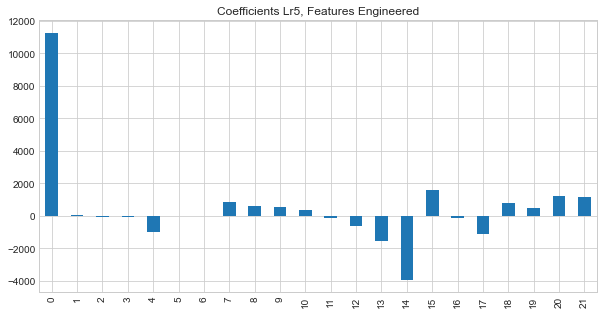

In [63]:
pd.Series(lr5.coef_).plot(kind="bar", title="Coefficients Lr5, Features Engineered",figsize=(10,5))

<AxesSubplot:title={'center':'Coefficients Lr5, Features Engineered'}>

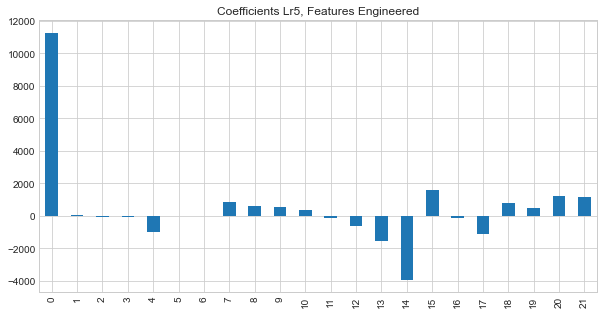

In [64]:
pd.Series(lr5_t.coef_).plot(kind="bar", title="Coefficients Lr5, Features Engineered",figsize=(10,5))

## Combining Feature Scaling and Feature Engineering

In [65]:
# Make a model with scaled and engineered features

# Change column order to make addition of scaled features easier
col_order_ls = ['carat','depth', 'table', 'x', 'y', 'z', 'cut', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']

# Re order columns
X_train = X_train[col_order_ls]
X_val = X_val[col_order_ls]
X_test = X_test[col_order_ls]

# Replace column values with values from scaled data
X_train[['carat','depth', 'table', 'x', 'y', 'z']] = X_train_scaled
X_val[['carat','depth', 'table', 'x', 'y', 'z']] = X_val_scaled
X_test[['carat','depth', 'table', 'x', 'y', 'z']] = X_test_scaled

print(X_train.shape)
X_train.head()

(34521, 22)


,carat,depth,table,x,y,z,cut,color_D,color_E,color_F,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
key_0,,,,,,,,,,,,,,,,,,,,,
6881,0.760655,-0.659368,3.380087,0.930953,0.872289,0.797898,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
15412,1.500090,-0.310659,-1.101247,1.493291,1.399586,1.387879,3.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3782,0.443755,1.572368,0.691287,0.538209,0.491944,0.713615,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
34635,-1.035114,0.107792,-1.101247,-1.202362,-1.193677,-1.168703,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
37155,-1.013987,-0.519884,-0.204980,-1.139880,-1.141812,-1.168703,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [66]:
# Verify that index values match in both datasets
# We expect to see the same number of rows in X_train as the sum value
X_train.shape[0] == sum(X_train.index == y_train.index)

True

In [67]:
# Model
lr6 = LinearRegression()

lr6.fit(X_train, y_train)
lr6.score(X_val, y_val)

0.9222440126627846

In [68]:
# Model
lr6_t = LinearRegression()

lr6_t.fit(X_train, y_train)
lr6_t.score(X_test, y_test)

0.9182653737780205

In [69]:
res6 = calc_cost(y_val, lr6.predict(X_val))

MSE: 1225239.089373007
MAE: 743.8763953015349
RMSE: 1106.9051853582614


In [70]:
res6_t = calc_cost(y_test, lr6_t.predict(X_test))

MSE: 1299320.7594362495
MAE: 743.5698965755569
RMSE: 1139.8775194889358


## Percent Decrease in the Cost Function

In [71]:
delta_mse = ((res1['MSE']- res6['MSE'])/res1['MSE'])*100
delta_mae = ((res1['MAE']- res6['MAE'])/res1['MAE'])*100
delta_rmse = ((res1['RMSE']- res6['RMSE'])/res1['RMSE'])*100

delta_ls = [round(delta_mse), round(delta_mae), round(delta_rmse)]
delta_ls2 = ["MSE % decrease", "MAE % decrease", "RMSE % decrease"]
    
for x in range(len(delta_ls)):
    print(f"{delta_ls2[x]}: {delta_ls[x]}")
        

MSE % decrease: 46
MAE % decrease: 17
RMSE % decrease: 27


In [72]:
delta_mse = ((res1['MSE']- res6_t['MSE'])/res1['MSE'])*100
delta_mae = ((res1['MAE']- res6_t['MAE'])/res1['MAE'])*100
delta_rmse = ((res1['RMSE']- res6_t['RMSE'])/res1['RMSE'])*100

delta_ls = [round(delta_mse), round(delta_mae), round(delta_rmse)]
delta_ls2 = ["MSE % decrease", "MAE % decrease", "RMSE % decrease"]
    
for x in range(len(delta_ls)):
    print(f"{delta_ls2[x]}: {delta_ls[x]}")
        
    

MSE % decrease: 43
MAE % decrease: 17
RMSE % decrease: 24


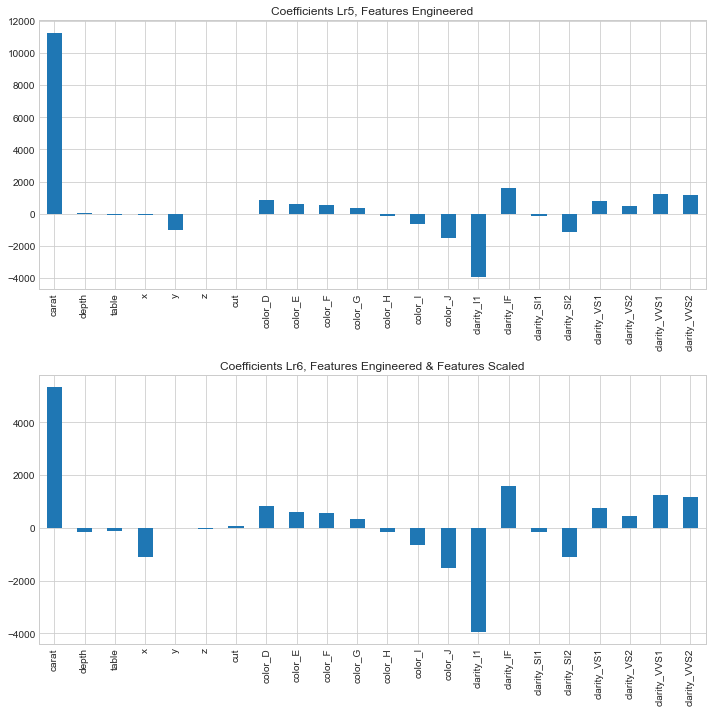

In [73]:
# plot results between scaled and unscaled

fig, ax = plt.subplots(2,1)

pd.Series(lr5.coef_).plot(
    kind="bar",
    title="Coefficients Lr5, Features Engineered",
    ax=ax[0]
)


pd.Series(lr6.coef_).plot(
    kind="bar", 
    title="Coefficients Lr6, Features Engineered & Features Scaled",
    ax=ax[1],
    figsize=(10,10)
)

ax[0].set_xticklabels(X_train.columns)
ax[1].set_xticklabels(X_train.columns)
plt.tight_layout()

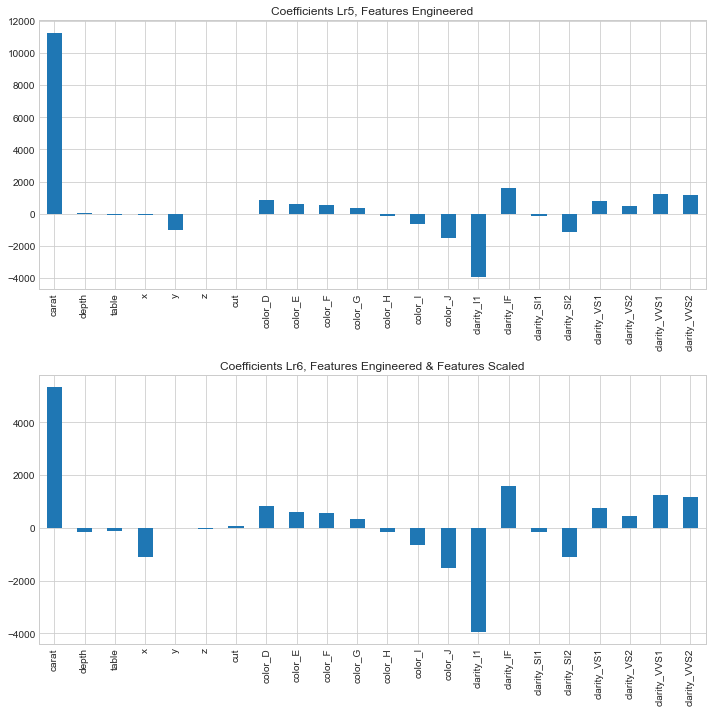

In [74]:
# plot results between scaled and unscaled

fig, ax = plt.subplots(2,1)

pd.Series(lr5_t.coef_).plot(
    kind="bar",
    title="Coefficients Lr5, Features Engineered",
    ax=ax[0]
)


pd.Series(lr6_t.coef_).plot(
    kind="bar", 
    title="Coefficients Lr6, Features Engineered & Features Scaled",
    ax=ax[1],
    figsize=(10,10)
)

ax[0].set_xticklabels(X_train.columns)
ax[1].set_xticklabels(X_train.columns)
plt.tight_layout()

## Summary


- Baseline -
MSE: 15959446.675367089
MAE: 3040.771604515672
RMSE: 3994.927618288858



### Using Model for one record prediction y = (a x1) + (b x2) + (c x3) + (d x4) + (e x5) + (f x6) + (g x7) + intercept

- lr.score (val) = 0.8661014078099777
- lr.score (test) = 0.8589396072085457
- res 1 - 
MSE: 2273010.7496576365
MAE: 897.1133312353479
RMSE: 1507.6507386187413

### Feature Scaling

#### Standard Scaler

- lr2.score (val) = 0.8661014078099777
- res 2 - 
MSE: 2109905.5491603212
MAE: 874.8336552092414
RMSE: 1452.5513929497715

- lr2.score (test) = 0.8589396072085457
- res 2 - 
MSE: 2242411.878050298
MAE: 889.4218078106036
RMSE: 1497.4684898355283

#### Robust Scaler

- lr3.score (val) = 0.8661014078099777
- res 3 - 
MSE: 2109905.5491603212
MAE: 874.8336552092425
RMSE: 1452.5513929497715

- lr3.score (test) = 0.8589396072085457
- res 3 - 
MSE: 2242411.878050298
MAE: 889.4218078106045
RMSE: 1497.4684898355283

####  Min Max Scaler

- lr4.score (val) = 0.8661014078099777
- res 4 - 
MSE: 2109905.5491603212
MAE: 874.8336552092418
RMSE: 1452.5513929497715

- lr4.score (test) = 0.8589396072085457
- res 4 - 
MSE: 2242411.878050298
MAE: 889.4218078106037
RMSE: 1497.4684898355283

### Feature Engineering

#### One Hot and Ordinally Encoded Features

- lr5.score (val) = 0.9222440126627846
- res 5 -
MSE: 1225239.089373007
MAE: 743.8763953015348
RMSE: 1106.9051853582614

- lr5.score (test) = 0.9182653737780205
- res 5 -
MSE: 1299320.7594362495
MAE: 743.5698965755569
RMSE: 1139.8775194889358


### Combining Feature Scaling and Feature Engineering

- lr6.score (val) = 0.9222440126627846
- res 6 - 
MSE: 1225239.089373007
MAE: 743.8763953015349
RMSE: 1106.9051853582614

- lr6.score (test) = 0.9182653737780205
- res 6 - 
MSE: 1299320.7594362495
MAE: 743.5698965755569
RMSE: 1139.8775194889358

### Percent Decrease in the Cost Function

- val - 
MSE % decrease: 43
MAE % decrease: 17
RMSE % decrease: 24

- test - 
MSE % decrease: 43
MAE % decrease: 17
RMSE % decrease: 24
